# Regularization in Deep Learning  L2 Regularization in ANN  L1 Regularization  Weight Decay in ANN

### Impoting Libraries

In [1]:
#pip install optree

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

2024-08-28 06:28:35.600966: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-28 06:28:35.606917: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-28 06:28:35.626050: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-28 06:28:35.657223: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-28 06:28:35.666470: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-28 06:28:35.689110: I tensorflow/core/platform/cpu_feature_gu

## Creating Data Set
### `make_moons` Function in scikit-learn

`make_moons` is a function provided by the `sklearn.datasets` module in the scikit-learn library. It is commonly used to generate synthetic datasets for binary classification problems, especially for educational and illustrative purposes. The `make_moons` function creates a toy dataset that consists of two interleaving half circles, or "moons." This type of dataset is particularly useful for visualizing and understanding the performance of clustering algorithms, decision boundaries, and classification models.

### Key Features of `make_moons`

- **Two Classes**: The dataset consists of two classes that are shaped like crescents or moons. This can be a good way to test algorithms' abilities to handle non-linearly separable data.

- **Noise Parameter**: You can add noise to the data points using the `noise` parameter. This helps simulate real-world scenarios where data is not perfectly separated.

- **Number of Samples**: You can specify the number of samples you want in the dataset using the `n_samples` parameter.

- **Random State**: The `random_state` parameter allows you to control the randomness for reproducibility of the dataset.

## Example Usage

Here's how you might use `make_moons` to generate and visualize the dataset:

```python
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Generate the dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=42)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('make_moons Dataset')
plt.show()
```

### Parameters of make_moons
**n_samples: (default=100)** The total number of points generated.<br>
**noise: (default=None)** Standard deviation of Gaussian noise added to the data.<br>
**random_state: (default=None)** Controls the shuffling and randomness of the sample creation.

### Output of make_moons
X: A 2D array of shape (n_samples, 2). It contains the coordinates of the generated samples.<br>
y: A 1D array of shape (n_samples,). It contains the class labels (0 or 1) for each sample.

In [26]:
X, y = make_moons(100, noise=0.25,random_state=42)

(100,)

### Ploting the Data set

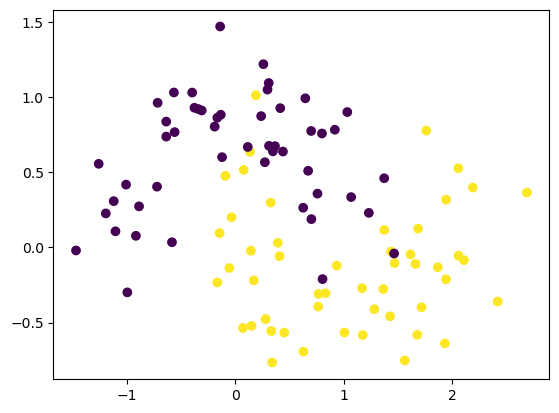

In [27]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

### Split data into test & Train 

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [45]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((80, 2), (20, 2), (80,), (20,))

### Model Creation

In [46]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2, activation="relu"))   # Input Layer
model1.add(Dense(128, activation="relu"))               # Hidden Layer
model1.add(Dense(1,activation='sigmoid'))               # Output Layer

model1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

### Compiling & Training of Model

In [47]:
adam = Adam(learning_rate=0.01)     
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X_train, y_train, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 9s 914us/step


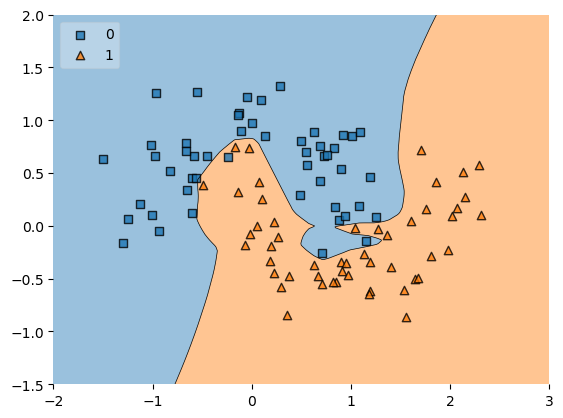

In [10]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

```python
Above decision plot indicate that our model is overfit 
here decision boundry is very complicated it is try learn each & Every thing 
```

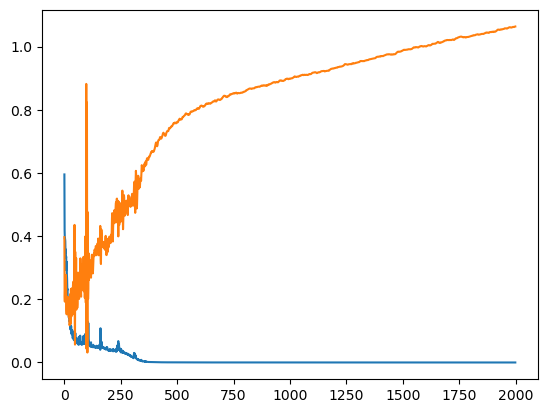

In [11]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

To Solve the issue of  **Overfitting** we use Concept of `Regularization`

## l2 Regularization 

### Creating model by using l2 regularization

In [12]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

### Model Training 

In [14]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 9s 941us/step


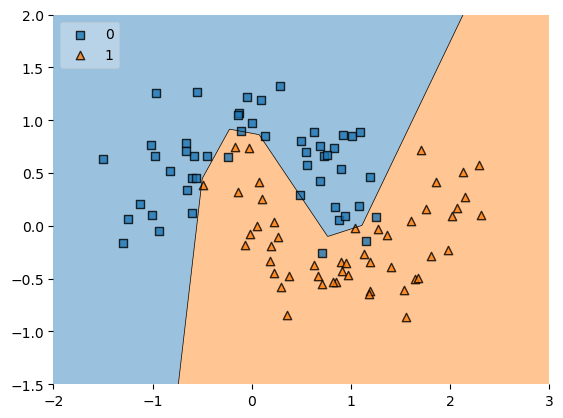

In [15]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

```python
Now decision boundry sharp & better than before  now value of overfitting is reduce 
```

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [ ]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

In [ ]:
sns.boxplot(model1_weight_layer1)

In [ ]:
sns.boxplot(model2_weight_layer1)

In [ ]:
model1_weight_layer1.min()

In [ ]:
model2_weight_layer1.min()

In [ ]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)

In [ ]:
model1.get_weights()[0].reshape(256)